# Set up


## Imports

In [1]:
%matplotlib inline

In [2]:
import sys
import os
from pathlib import Path
import math

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context(context="talk", font_scale=1, rc=None)
sns.set_style('whitegrid')

In [4]:
# Load the "autoreload" extension
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
from pandas import IndexSlice as idx
import numpy as np
import networkx as nx

from collections import OrderedDict

from munch import Munch
from tqdm import tqdm

In [6]:
# import crunchers.sklearn_helpers.exploration as expl
# import crunchers.statsmodels_helpers.lazy_stats as stats
# import crunchers.pandas_helpers.transformations as xform

In [7]:
import biorep_etl.data.load_recode as loading
import biorep_etl.data.crf_dag as dag

## Constants

### Get info for converting/moving this file to `reports`

In [8]:
# %%javascript
# var kernel = IPython.notebook.kernel;
# var thename = window.document.getElementById("notebook_name").innerHTML;
# var command = "IPYNB_NAME = " + "'"+thename+"'";
# kernel.execute(command);

In [9]:
# rv = Munch()

# rv.rep_id = 'yyy-mm-dd'
# rv.desc = 'blank'
# rv.ipnb = Path('{IPYNB_NAME}.ipynb'.format(IPYNB_NAME=IPYNB_NAME))
# rv.html = '{ipnb}.html'.format(ipnb=rv.ipnb.stem)
# rv.files = '{ipnb}_files'.format(ipnb=rv.ipnb.stem)
# rv.reprt_dir = '../../reports/{IPYNB_NAME}/'.format(IPYNB_NAME=IPYNB_NAME)

### Other Constants

## Paths

### Inputs

In [10]:
data_ = "../data/raw/SnapperGIBioreposito_DATA_2016-12-22_1633.csv"
labels_ = "../data/raw/SnapperGIBioreposito_DATA_LABELS_2016-12-22_1633.csv"
data_dict_ = "../data/raw/SnapperGIBiorepository_DataDictionary_2016-12-06.csv"

### Outputs

In [11]:
dot_ = '../reports/branch_logic.dot'
svg_ = '../reports/branch_logic.svg'

## Functions

## Loading

In [12]:
data_dict = dag.load_data_dict(data_dict_)
data_dict.head(2)

,Variable / Field Name,Form Name,Section Header,Field Type,Field Label,"Choices, Calculations, OR Slider Labels",Field Note,Text Validation Type OR Show Slider Number,Text Validation Min,Text Validation Max,Identifier?,Branching Logic (Show field only if...),Required Field?,Custom Alignment,Question Number (surveys only),Matrix Group Name,Matrix Ranking?,Field Annotation
0,record_id,ibd_biorepository_sample_database,NaN,text,Record ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,samplenumber,ibd_biorepository_sample_database,NaN,text,Sample number (unique),NaN,unique identifier for each individual sample,number_4dp,1010000001,99999999999,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN


In [13]:
field_map = dag.make_field_map(data_dict)

In [14]:
field_map['Medical record number']

'mrn'

In [15]:
edges_raw = dag.make_edges(data_dict)
edges_raw.iloc[10:15,:]

,field_name,branch_logic
10,prior_protocol_number,[biorepconsent] = '0'
11,ibdyesno,NaN
12,ibdtype,[ibdyesno] = '1'
13,otheribddx,[ibdtype] = '6'
14,family_history,[ibdyesno] = '1'


# Build DAG

In [31]:
g = nx.DiGraph()

In [17]:
nodes_raw = dag.make_top_level_nodes_and_others(edges_raw)
nodes_raw.keys()

dict_keys(['lower_edges_raw', 'top_level_nodes'])

In [19]:
dag.add_top_level_edges(g, top_level_nodes=nodes_raw.top_level_nodes)

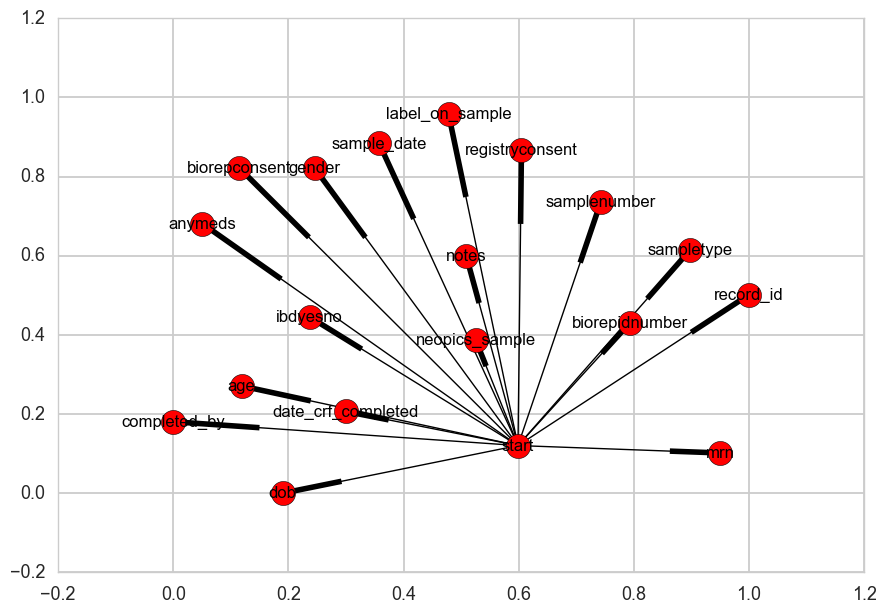

In [20]:
nx.draw_networkx(g, with_labels=True)

In [32]:
dag.add_lower_edges(g,lower_edges_raw=nodes_raw.lower_edges_raw)

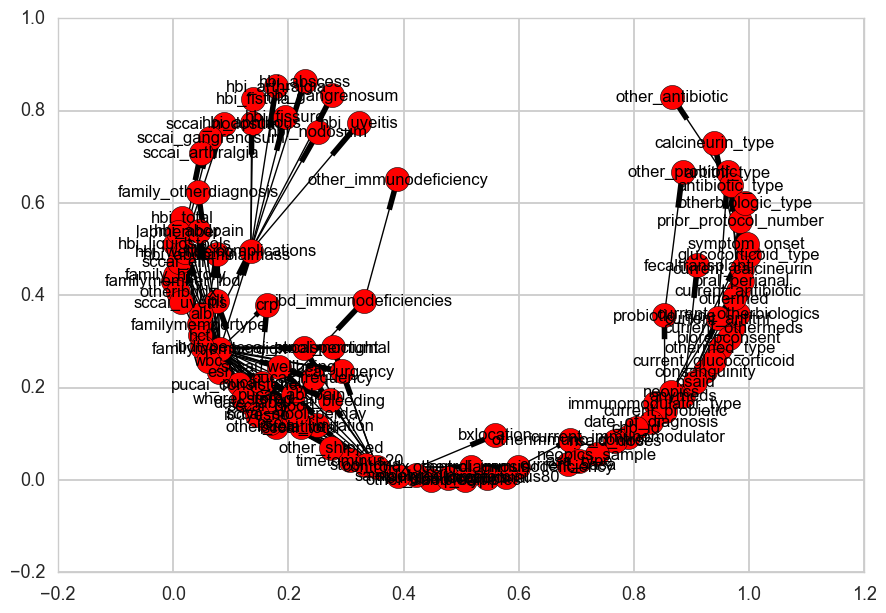

In [33]:
nx.draw_networkx(g, with_labels=True)

In [34]:
a = nx.nx_agraph.to_agraph(g)

In [35]:
a.write(dot_)

In [44]:
!/usr/bin/dot -Tsvg $dot_ -o $svg_

# Convert to HTML report and move to reports folder

In [ ]:
# rv.reprt_dir

In [ ]:
# !jupyter nbconvert --to html_toc $rv.ipnb

In [ ]:
# !mkdir -p $rv.reprt_dir
## !mv -f $rv.html $rv.files $rv.reprt_dir